# Step1 - Understanding Problem Statement
# Step2 - OBJECTIVE : Classification model on Income
# Step3 - Understanding Variables(description)

# Step4 - Starting with Project

In [165]:
# Import required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split #to partition the data #Lib -> Module -> function
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix #importing performance metrics: accuracy score, confusion matrix


In [166]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fb

In [167]:
# Importing Dataset
data_income = pd.read_csv('income(1).csv')

#Creating copy of original data
data = data_income.copy()

# Step5 - Exploratory Data Analysis(EDA)

In [169]:
# Getting to know the data

In [170]:
#
data.shape

(31978, 13)

In [171]:
# Checking var types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [172]:
data.dtypes.value_counts()

object    9
int64     4
Name: count, dtype: int64

In [173]:
data.select_dtypes(include = 'O')

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
0,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,United-States,"less than or equal to 50,000"
1,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,United-States,"less than or equal to 50,000"
2,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"greater than 50,000"
3,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,Mexico,"less than or equal to 50,000"
4,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...
31973,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,United-States,"less than or equal to 50,000"
31974,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,United-States,"less than or equal to 50,000"
31975,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States,"less than or equal to 50,000"
31976,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,United-States,"less than or equal to 50,000"


In [174]:
data.select_dtypes(include = 'int')

,age,capitalgain,capitalloss,hoursperweek
0,45,0,0,28
1,24,0,0,40
2,44,0,0,40
3,27,0,0,40
4,20,0,0,35
...,...,...,...,...
31973,34,594,0,60
31974,34,0,0,40
31975,23,0,0,40
31976,42,0,0,40


In [175]:
# checking for missing values
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [176]:
# checking for dupliates
data.duplicated().sum()

3462

In [177]:
data[data.duplicated()]

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
416,33,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
495,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
598,61,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
1002,39,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
1196,44,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31949,33,Private,Some-college,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31962,25,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,"less than or equal to 50,000"
31965,63,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31968,17,?,11th,Never-married,?,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"


In [178]:
# Summary of numerical variables

summary_num = data.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [179]:
# Summary of categorical var
summary_cat = data.describe(include = 'O')
print(summary_cat.T)

               count unique                            top   freq
JobType        31978      9                        Private  22286
EdType         31978     16                        HS-grad  10368
maritalstatus  31978      7             Married-civ-spouse  14692
occupation     31978     15                 Prof-specialty   4038
relationship   31978      6                        Husband  12947
race           31978      5                          White  27430
gender         31978      2                           Male  21370
nativecountry  31978     41                  United-States  29170
SalStat        31978      2   less than or equal to 50,000  24283


In [180]:
# Frequency of each category of categorical var

for i in data.columns[data.dtypes == 'object']:
    print('Number of categories of',data[i].name, ':', data[i].nunique() )
    print(data[i].value_counts())
    print()

Number of categories of JobType : 9
JobType
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
?                    1809
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Number of categories of EdType : 16
EdType
HS-grad         10368
Some-college     7187
Bachelors        5210
Masters          1674
Assoc-voc        1366
11th             1167
Assoc-acdm       1055
10th              921
7th-8th           627
Prof-school       559
9th               506
12th              417
Doctorate         390
5th-6th           318
1st-4th           163
Preschool          50
Name: count, dtype: int64

Number of categories of maritalstatus : 7
maritalstatus
Married-civ-spouse       14692
Never-married            10488
Divorced                  4394
Separated                 1005
Widowed                    979
Married-spouse-absent      397
Married-AF-spouse           23


In [181]:
# replacing '?' : nan
data = data.replace(' ?', np.nan)

In [182]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [183]:
summary_num = data.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [184]:
# new categorization
for i in data.columns[data.dtypes == 'object']:
    print('Number of categories of',data[i].name, ':', data[i].nunique() )
    print(data[i].value_counts())
    print()

Number of categories of JobType : 8
JobType
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Number of categories of EdType : 16
EdType
HS-grad         10368
Some-college     7187
Bachelors        5210
Masters          1674
Assoc-voc        1366
11th             1167
Assoc-acdm       1055
10th              921
7th-8th           627
Prof-school       559
9th               506
12th              417
Doctorate         390
5th-6th           318
1st-4th           163
Preschool          50
Name: count, dtype: int64

Number of categories of maritalstatus : 7
maritalstatus
Married-civ-spouse       14692
Never-married            10488
Divorced                  4394
Separated                 1005
Widowed                    979
Married-spouse-absent      397
Married-AF-spouse           23
Name: count, dtype: int64


# Step6 - Data Preprocessing

In [186]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [187]:
missing = data[data.isnull().any(axis = 1)]

In [188]:
# null values in JobType = 1809
# null values in Occupation = 1816
# There are 1809 rows where 'Jobtype' and 'Occupation' has null values
# The remaining 7 missing values for occupation is because job type is 'never worked' there.


In [189]:
# dealing with missing values
data2 = data.dropna(axis = 0) #drop rows containing nan values

In [190]:
# Relationship with independent variables
numerical_df = data2.select_dtypes(include=['number'])
correlation = numerical_df.corr()

In [191]:
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


<Axes: >

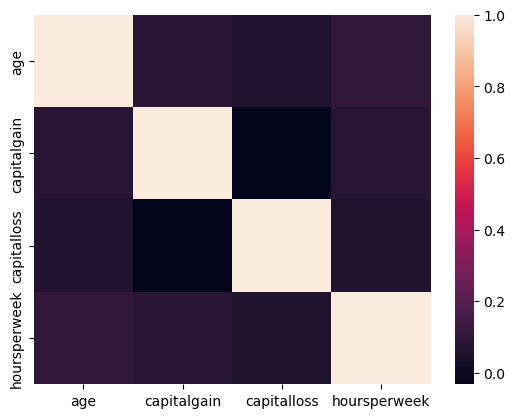

In [192]:
sns.heatmap(correlation)

# Step7 - crosstable and data visualization


In [194]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

col_0      count
gender          
Female  0.324315
Male    0.675685


<Axes: xlabel='gender', ylabel='count'>

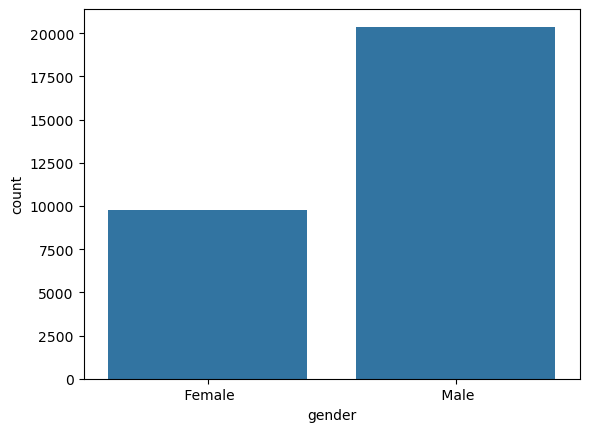

In [195]:
gender = pd.crosstab(index = data2['gender'], columns = 'count', normalize = True)
print(gender)
sns.countplot(x = data2['gender'])

In [196]:
# Gender vs Salary status
gender_salstat= pd.crosstab(index =data2['gender'] , columns = data2['SalStat'], margins = True, normalize = 'index' )
print(gender_salstat)

SalStat  greater than 50,000  less than or equal to 50,000
gender                                                    
 Female             0.113678                      0.886322
 Male               0.313837                      0.686163
All                 0.248922                      0.751078


col_0                            count
SalStat                               
greater than 50,000           0.248922
less than or equal to 50,000  0.751078


<Axes: xlabel='SalStat', ylabel='count'>

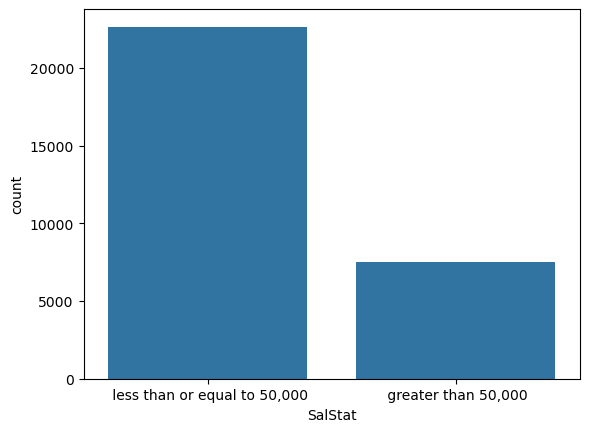

In [197]:
# Frequency distribution of salary_status
sal = pd.crosstab(index = data2['SalStat'], columns = 'count', normalize = True)
print(sal)
SalStat = sns.countplot(x= data2['SalStat'])
SalStat

In [198]:
# insights from above => 
# 75% people's salary status -> <= 50,000
# 25% people's salary status -> > 50,000


C:\Users\JKD\AppData\Local\Temp\ipykernel_13024\1746611398.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['age'], bins= 10, kde = False)


<Axes: xlabel='age'>

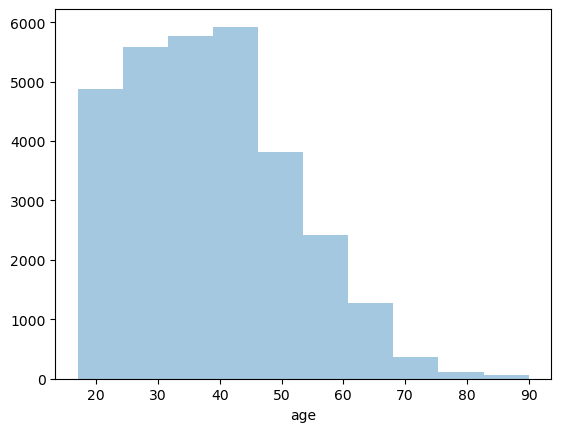

In [199]:
# Histogram of Age

sns.distplot(data2['age'], bins= 10, kde = False)


In [200]:
# insights from above ->

# people with 20 - 45 age are hight in frequency

In [201]:
pd.crosstab(index = data2['age'], columns =data2['SalStat'] )

SalStat,"greater than 50,000","less than or equal to 50,000"
age,,
17,0,328
18,0,447
19,1,593
20,0,629
21,3,618
...,...,...
84,1,7
85,0,3
86,0,1


SalStat
greater than 50,000             43.0
less than or equal to 50,000    34.0
Name: age, dtype: float64

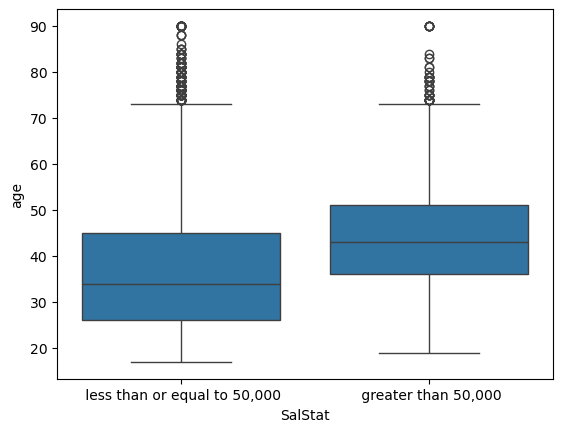

In [202]:
# Boxplot - Age vs Salary Status


sns.boxplot(x = 'SalStat',y = 'age', data = data2)
data2.groupby('SalStat')['age'].median()

In [203]:
# insights from above =>
# age(35-50) > 50000
# age(25-35) <= 50000

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.7,61.3
Local-gov,29.5,70.5
Private,21.9,78.1
Self-emp-inc,55.9,44.1
Self-emp-not-inc,28.6,71.4
State-gov,26.9,73.1
Without-pay,0.0,100.0
All,24.9,75.1


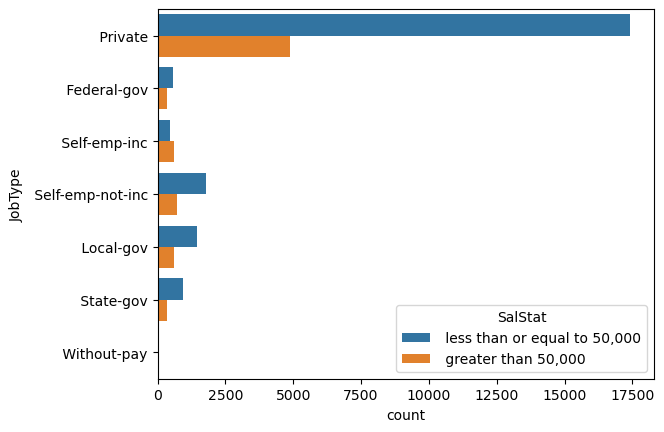

In [204]:
# JobType
sns.countplot(y = 'JobType', hue = 'SalStat', data = data2)
job_salstat = pd.crosstab(index = data2['JobType'], columns = data2['SalStat'], margins = True, normalize = 'index')
round(job_salstat*100, 1)

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.2,92.8
11th,5.6,94.4
12th,7.7,92.3
1st-4th,4.0,96.0
5th-6th,4.2,95.8
7th-8th,6.3,93.7
9th,5.5,94.5
Assoc-acdm,25.4,74.6
Assoc-voc,26.3,73.7


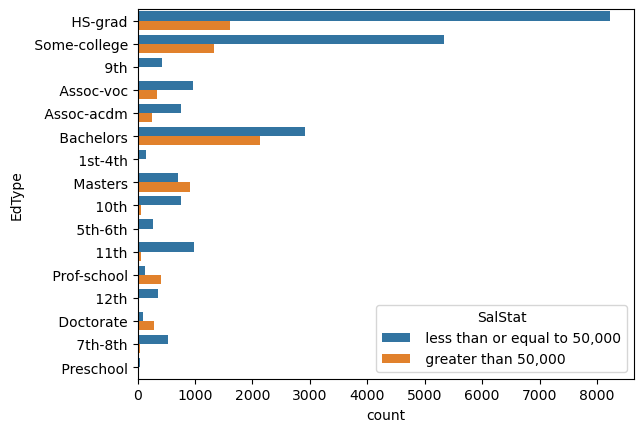

In [205]:
# Education
sns.countplot(y = 'EdType', hue = 'SalStat', data = data2)
EdType_salstat = pd.crosstab(index = data2['EdType'], columns = data2['SalStat'], margins = True, normalize = 'index')
round(EdType_salstat*100, 1)

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.4,86.6
Armed-Forces,11.1,88.9
Craft-repair,22.5,77.5
Exec-managerial,48.5,51.5
Farming-fishing,11.6,88.4
Handlers-cleaners,6.1,93.9
Machine-op-inspct,12.5,87.5
Other-service,4.1,95.9
Priv-house-serv,0.7,99.3


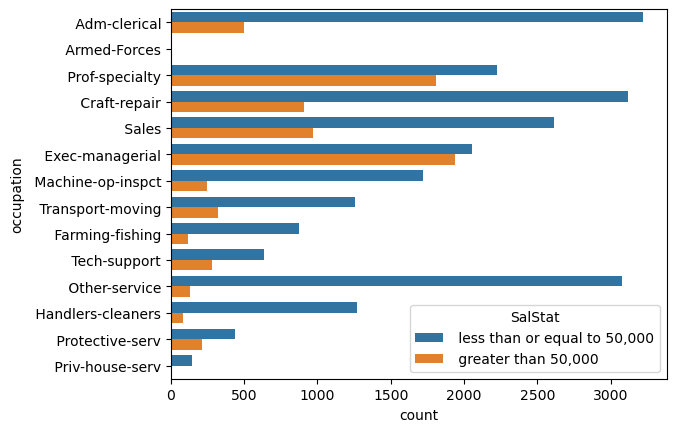

In [206]:
# Occupation
sns.countplot(y = 'occupation', hue = 'SalStat', data = data2)
occupation_salstat = pd.crosstab(index = data2['occupation'], columns = data2['SalStat'], margins = True, normalize = 'index')
round(occupation_salstat*100, 1)

C:\Users\JKD\AppData\Local\Temp\ipykernel_13024\2211800559.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['capitalgain'], bins = 10, kde = False)


<Axes: xlabel='capitalgain'>

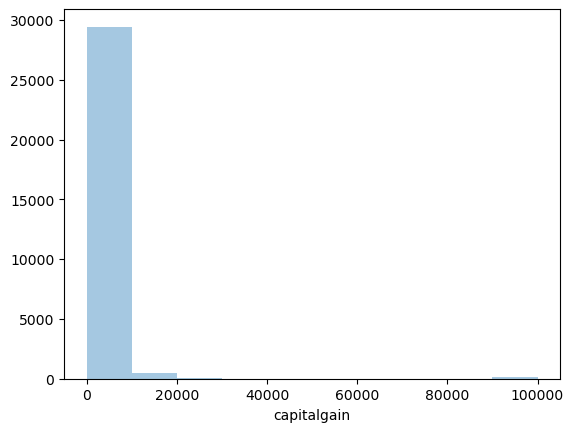

In [207]:
# Capital gain
sns.distplot(data2['capitalgain'], bins = 10, kde = False)

C:\Users\JKD\AppData\Local\Temp\ipykernel_13024\4194796564.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['capitalloss'], bins = 10, kde = False)


<Axes: xlabel='capitalloss'>

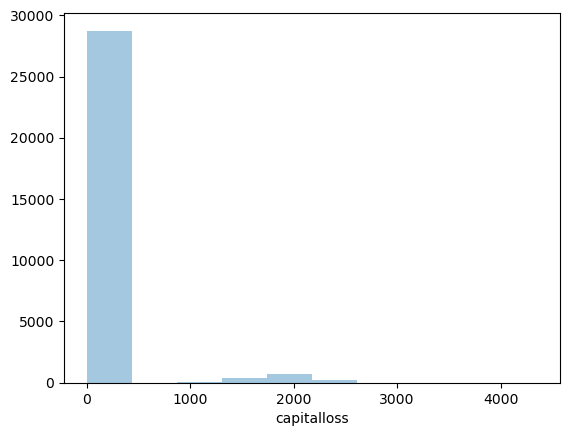

In [208]:
# Capital loss
sns.distplot(data2['capitalloss'], bins = 10, kde = False)

# Step8 - Model Building 

## 1. Logistic Regression

In [211]:
data2['SalStat'].value_counts()

SalStat
less than or equal to 50,000    22654
greater than 50,000              7508
Name: count, dtype: int64

In [212]:
print(data2['SalStat'].unique())

[' less than or equal to 50,000' ' greater than 50,000']


In [213]:
# indexing sal_stat with 0,1
data2 = pd.DataFrame(data2)
data2.loc[:, 'SalStat'] = data2['SalStat'].map({' less than or equal to 50,000' : 0, ' greater than 50,000': 1})
data2['SalStat']

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: object

In [214]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   JobType        30162 non-null  object
 2   EdType         30162 non-null  object
 3   maritalstatus  30162 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   30162 non-null  object
 6   race           30162 non-null  object
 7   gender         30162 non-null  object
 8   capitalgain    30162 non-null  int64 
 9   capitalloss    30162 non-null  int64 
 10  hoursperweek   30162 non-null  int64 
 11  nativecountry  30162 non-null  object
 12  SalStat        30162 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [215]:

new_data = pd.get_dummies(data2, drop_first = True).astype(int)
new_data

,age,capitalgain,capitalloss,hoursperweek,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,JobType_ Without-pay,...,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia,SalStat_1
0,45,0,0,28,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,44,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,27,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31974,34,0,0,40,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31975,23,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31976,42,0,0,40,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [216]:
# Storing the columns name
columns_list = list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occu

In [217]:
# Separate input var (creating dependent var together)

features = list(set(columns_list)-set(['SalStat_1']))
print(features)

['JobType_ Self-emp-inc', 'nativecountry_ India', 'relationship_ Wife', 'nativecountry_ Germany', 'occupation_ Prof-specialty', 'occupation_ Exec-managerial', 'nativecountry_ El-Salvador', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'maritalstatus_ Married-spouse-absent', 'nativecountry_ Nicaragua', 'nativecountry_ Ireland', 'relationship_ Unmarried', 'nativecountry_ Italy', 'nativecountry_ England', 'nativecountry_ Japan', 'JobType_ Private', 'nativecountry_ Mexico', 'nativecountry_ Jamaica', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'occupation_ Handlers-cleaners', 'nativecountry_ Laos', 'JobType_ State-gov', 'EdType_ 5th-6th', 'nativecountry_ Thailand', 'race_ Black', 'nativecountry_ Peru', 'hoursperweek', 'nativecountry_ Columbia', 'EdType_ Masters', 'EdType_ 12th', 'nativecountry_ Holand-Netherlands', 'occupation_ Priv-house-serv', 'EdType_ Doctorate', 'EdType_ Some-college', 'EdType_ HS-grad', 'nativecountry_ Haiti', 'nativecountry_ Honduras', 'nativecountry_ Domin

In [218]:
# storing output var separately

y = new_data['SalStat_1'].values
print(y)

[0 0 1 ... 0 0 0]


In [219]:
# independent var in dummies form sep for modelling
x = new_data[features].values
print(x)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [220]:
# Splitting the data into train and test

train_x,test_x,  train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 0)


In [221]:
# Make an instance of model

logistic = LogisticRegression()

In [222]:
# Fitting the values for x and y

logistic.fit(train_x, train_y)
print(logistic.coef_)
print(logistic.intercept_)

[[ 1.61680688e-01 -2.01800058e-02  2.46053069e-01  1.45209976e-02
   6.82341508e-01  8.96106674e-01 -3.95732995e-02 -7.39669511e-03
  -5.83287687e-02 -1.28551589e-02 -3.87546615e-03 -5.75216392e-01
  -1.83459102e-03  1.26793022e-02 -4.66621789e-04 -3.28931330e-01
  -2.56829964e-01 -1.19686249e-02 -2.49400763e-01 -1.71961728e-01
  -5.95234778e-02 -3.38698272e-01 -6.12895244e-03 -1.26297439e-01
  -1.39924450e-01 -3.32427110e-03 -4.33431434e-01 -1.20559511e-02
   9.02743569e-03 -2.01516611e-02  5.25666786e-01 -9.56387967e-02
  -8.91018637e-04 -4.05940258e-02  2.47924692e-01 -3.95812128e-01
  -9.34891045e-01 -1.18013764e-02 -2.24104183e-03 -2.56409125e-02
  -8.14473039e-03 -3.26439685e-03 -1.36916052e-02 -2.62988018e-02
   9.74113601e-02 -3.89043805e-01 -9.32090328e-03  6.66684754e-04
  -1.41070764e-02 -7.22385473e-03 -2.17164396e-02 -8.10792619e-03
  -3.03995782e-01 -3.21078062e-01 -5.01516571e-01 -5.12969270e-04
   1.65584529e-01 -5.80716173e-01  7.21245606e-01 -4.12598637e-02
  -2.23458

C:\Users\JKD\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [223]:
# Prediction from test data
prediction = logistic.predict(test_x)
print(prediction)


[0 0 0 ... 0 0 0]


In [224]:
# confusion matrix

conf_matrix = confusion_matrix(test_y, prediction)
print(conf_matrix)

[[6290  533]
 [ 945 1281]]


<Axes: >

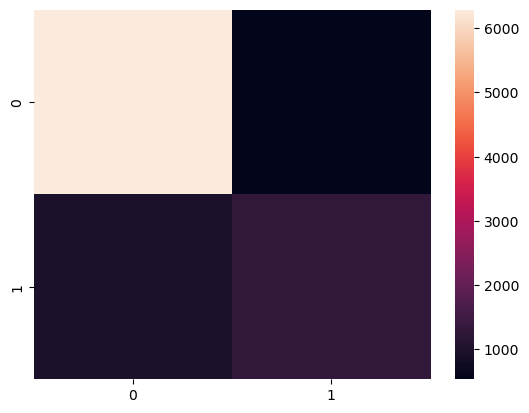

In [225]:
sns.heatmap(conf_matrix)

In [226]:
# calculating the accuracy
accuracyscore = accuracy_score(test_y, prediction)
print(accuracyscore)

0.8366670350314952


In [227]:
# printing misclassified values from the prediction

print('Misclassified samples : %d' % (test_y != prediction).sum())

Misclassified samples : 1478


# Step9 -  Validation(Removing insignificant variables)